<a href="https://colab.research.google.com/github/WiktoriaCecerska/Raport10/blob/main/stata_19_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

In [54]:
url = "http://theta.edu.pl/wp-content/uploads/2023/10/Dane.csv"
dane = pd.read_csv(url)
df.head()

,Start,Stop,SEX,height,weight,NTproBNP,Hemoglobina,sTfR,zgon
0,2008-12-23,2011-07-01,1,177,100,4.127134,12.246213,0.756122,1
1,2008-12-23,2011-07-01,0,170,84,5.351858,12.890751,0.966984,1
2,2008-12-19,2011-07-01,0,179,76,4.276666,14.340960,0.703098,0
3,2008-12-19,2011-07-01,1,186,121,5.036953,14.502095,0.883768,1
4,2008-12-18,2011-07-01,1,157,56,5.726848,16.274573,0.858662,1


In [8]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8100555b9f5efe0546c3461ba59ddb9ea326179fb01d6510c88087b1b4639944
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [32]:
from lifelines import WeibullFitter, ExponentialFitter, KaplanMeierFitter
from lifelines.utils import datetimes_to_durations
import matplotlib.pyplot as plt


In [53]:
dane['duration'] = datetimes_to_durations(dane['Start'], dane['Stop'])[0]

In [37]:
weibull_model = WeibullFitter()
weibull_model.fit(dane['duration'], event_observed = dane['zgon'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 87 total observations, 38 right-censored observations>

In [38]:
weibull_model.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,1224.351928,20.772623,1183.638335,1265.065522,1.0,58.892511,0.000000e+00,inf
rho_,8.468724,0.935764,6.634659,10.302788,1.0,7.981414,1.446659e-15,49.296197


In [39]:
weibull_model.hazard_

,Weibull_estimate
920.000000,0.000818
924.686047,0.000850
929.372093,0.000883
934.058140,0.000916
938.744186,0.000951
...,...
1304.255814,0.011091
1308.941860,0.011392
1313.627907,0.011700
1318.313953,0.012016


In [40]:
weibull_model.survival_function_

,Weibull_estimate
920.000000,0.914942
924.686047,0.911373
929.372093,0.907681
934.058140,0.903864
938.744186,0.899917
...,...
1304.255814,0.181204
1308.941860,0.171906
1313.627907,0.162852
1318.313953,0.154050


In [41]:
weibull_model.median_survival_time_

np.float64(1172.4941743385273)

In [42]:
weibull_model.AIC_

np.float64(687.8858271412171)

In [43]:
expo_model = ExponentialFitter()
expo_model.fit(dane['duration'], event_observed = dane['zgon'])

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 87 total observations, 38 right-censored observations>

In [44]:
expo_model.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,1928.71426,275.530605,1388.684198,2468.744322,0.0,7.0,2.559623e-12,38.507206


In [49]:
expo_model.hazard_

,Exponential_estimate
920.000000,0.000518
924.686047,0.000518
929.372093,0.000518
934.058140,0.000518
938.744186,0.000518
...,...
1304.255814,0.000518
1308.941860,0.000518
1313.627907,0.000518
1318.313953,0.000518


In [45]:
expo_model.survival_function_

,Exponential_estimate
920.000000,0.620641
924.686047,0.619135
929.372093,0.617633
934.058140,0.616134
938.744186,0.614639
...,...
1304.255814,0.508530
1308.941860,0.507296
1313.627907,0.506065
1318.313953,0.504837


In [47]:
print(round (expo_model.median_survival_time_, 2))

1336.88


In [48]:
print(round (expo_model.AIC_, 2))

841.33


In [51]:
kaplan_model = KaplanMeierFitter()
kaplan_model.fit(dane['duration'], event_observed = dane['zgon'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 87 total observations, 38 right-censored observations>

In [55]:
kaplan_model.median_survival_time_

np.float64(1176.0)

In [57]:
kaplan_model.survival_function_

,KM_estimate
timeline,
0.0,1.000000
920.0,0.977011
924.0,0.965517
925.0,0.942252
931.0,0.942252
932.0,0.942252
938.0,0.930015
939.0,0.905541
941.0,0.905541


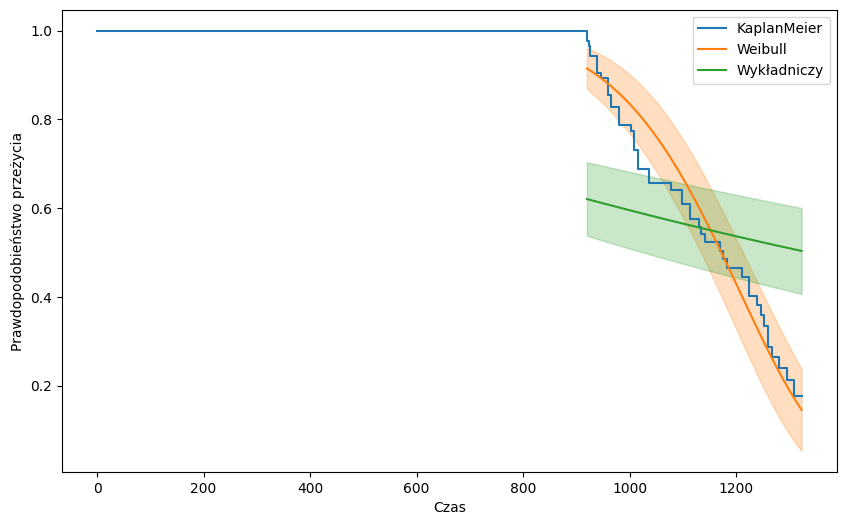

In [59]:
plt.figure(figsize=(10,6))
kaplan_model.plot_survival_function(label="KaplanMeier", ci_show=False)
weibull_model.plot_survival_function(label='Weibull')
expo_model.plot_survival_function(label='Wykładniczy')
plt.xlabel('Czas')
plt.ylabel('Prawdopodobieństwo przeżycia')
plt.legend()
plt.show()